In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
from matplotlib import pyplot as plt


In [10]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Converting the data into array
data = np.array(data)

In [29]:
#Separating the data into training and dev set, training because we want to check whether our algorithm works 
#or not and dev set(cross-validation set) because to reduce the risk of overfitting and we can perform 
#hyperparamter tuning on this set
m, n = data.shape

np.random.shuffle(data)
data_dev = data[0:1000].T#each column is an example rather than each row

Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
Y_train, X_train

(array([6, 6, 3, ..., 2, 3, 6]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [30]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # numerical stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)

    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 5 5 5] [6 1 2 ... 1 0 7]
0.09529268292682927
Iteration:  10
[2 1 6 ... 3 0 5] [6 1 2 ... 1 0 7]
0.2368780487804878
Iteration:  20
[2 1 6 ... 3 0 5] [6 1 2 ... 1 0 7]
0.3387317073170732
Iteration:  30
[2 1 6 ... 1 0 9] [6 1 2 ... 1 0 7]
0.4141463414634146
Iteration:  40
[2 1 6 ... 1 0 9] [6 1 2 ... 1 0 7]
0.4759512195121951
Iteration:  50
[6 1 6 ... 1 0 7] [6 1 2 ... 1 0 7]
0.5292439024390244
Iteration:  60
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.5713658536585365
Iteration:  70
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.6035121951219512
Iteration:  80
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.6303658536585366
Iteration:  90
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.6515609756097561
Iteration:  100
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.6693902439024391
Iteration:  110
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.6848536585365854
Iteration:  120
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.6986829268292682
Iteration:  130
[6 1 2 ... 1 0 7] [6 1 2 ... 1 0 7]
0.7100243902439024
Iteration:  140


Prediction:  [6]
Label:  6


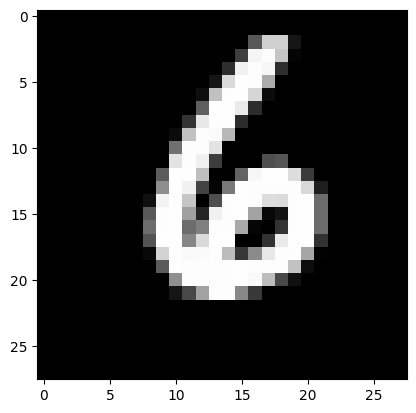

Prediction:  [1]
Label:  1


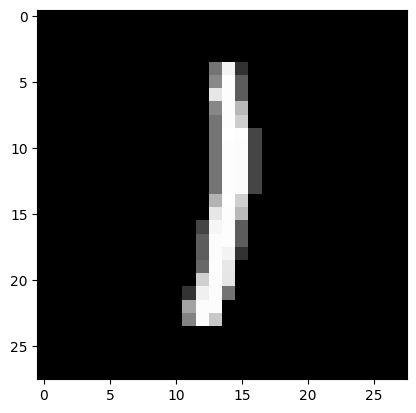

Prediction:  [2]
Label:  2


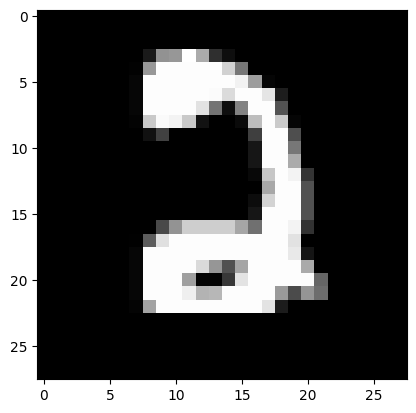

Prediction:  [0]
Label:  0


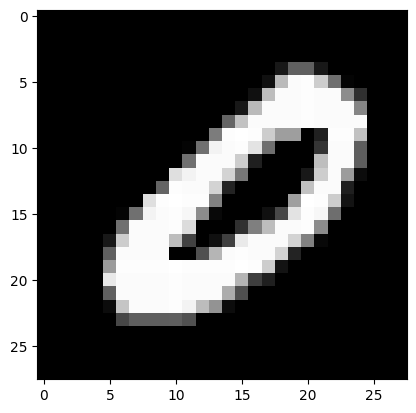

In [31]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [33]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 6 1 7 7 8 6 2 3 7 3 6 4 0 2 8 6 4 9 2 6 0 6 1 9 0 6 4 9 2 5 5 3 7 5 6 9
 4 1 2 7 0 0 3 1 3 1 9 8 9 6 4 9 8 5 9 8 7 5 2 2 8 0 1 7 7 0 8 1 0 0 7 2 1
 3 1 6 6 3 9 4 4 9 7 7 1 9 5 2 0 6 7 8 5 9 6 7 4 0 8 5 3 6 6 4 4 9 1 0 2 7
 0 9 4 4 8 6 6 1 9 0 9 3 9 1 9 9 6 0 9 8 1 0 8 1 1 6 6 6 5 4 9 1 7 1 9 1 3
 9 1 4 2 0 7 1 9 5 0 7 6 7 4 4 3 9 0 5 7 0 9 1 1 4 2 7 3 0 8 9 1 3 2 6 4 8
 2 8 0 8 8 7 9 7 2 8 9 4 2 8 7 1 8 6 6 6 0 2 7 9 0 0 8 3 6 7 2 7 7 6 2 4 9
 5 4 6 3 3 9 0 2 9 7 4 7 9 4 7 1 8 4 8 4 7 5 6 9 5 0 7 9 9 5 0 8 6 1 5 9 0
 0 7 2 9 4 4 0 6 0 1 9 6 5 2 7 8 5 5 0 8 0 2 8 9 6 9 4 6 6 7 5 8 6 5 3 9 0
 3 3 3 7 4 9 4 5 5 9 2 0 7 0 6 5 1 7 1 3 7 1 3 6 1 5 5 2 3 9 5 2 5 1 6 9 0
 2 3 9 0 3 5 7 9 7 3 4 6 1 6 4 7 7 3 4 5 2 0 2 7 8 7 4 5 6 4 2 0 8 8 6 7 6
 0 4 3 7 5 2 4 8 5 5 9 4 6 0 2 5 9 6 5 8 1 5 2 3 0 6 8 5 8 0 7 7 1 0 7 9 7
 6 5 3 1 4 5 5 4 0 2 0 9 8 4 2 0 8 2 3 5 1 7 4 1 4 4 8 7 4 5 5 7 0 2 0 1 3
 7 6 6 6 9 6 1 5 0 5 9 7 9 9 9 1 0 5 3 9 5 1 6 8 6 5 0 3 3 1 5 3 7 8 8 7 0
 1 1 8 0 2 5 6 1 7 2 4 1 

0.848

Still 85% accuracy, the model has generalized well to the data